![frame.png](pictures/frame.png)

# 总采样点数：len(waveform)
# 帧长：frame_length
# 重叠长度：hop_length
# 
#
#

# Ch1. 信号时域分析  1. 幅值包络分析
![AE.png](pictures/AE.png)

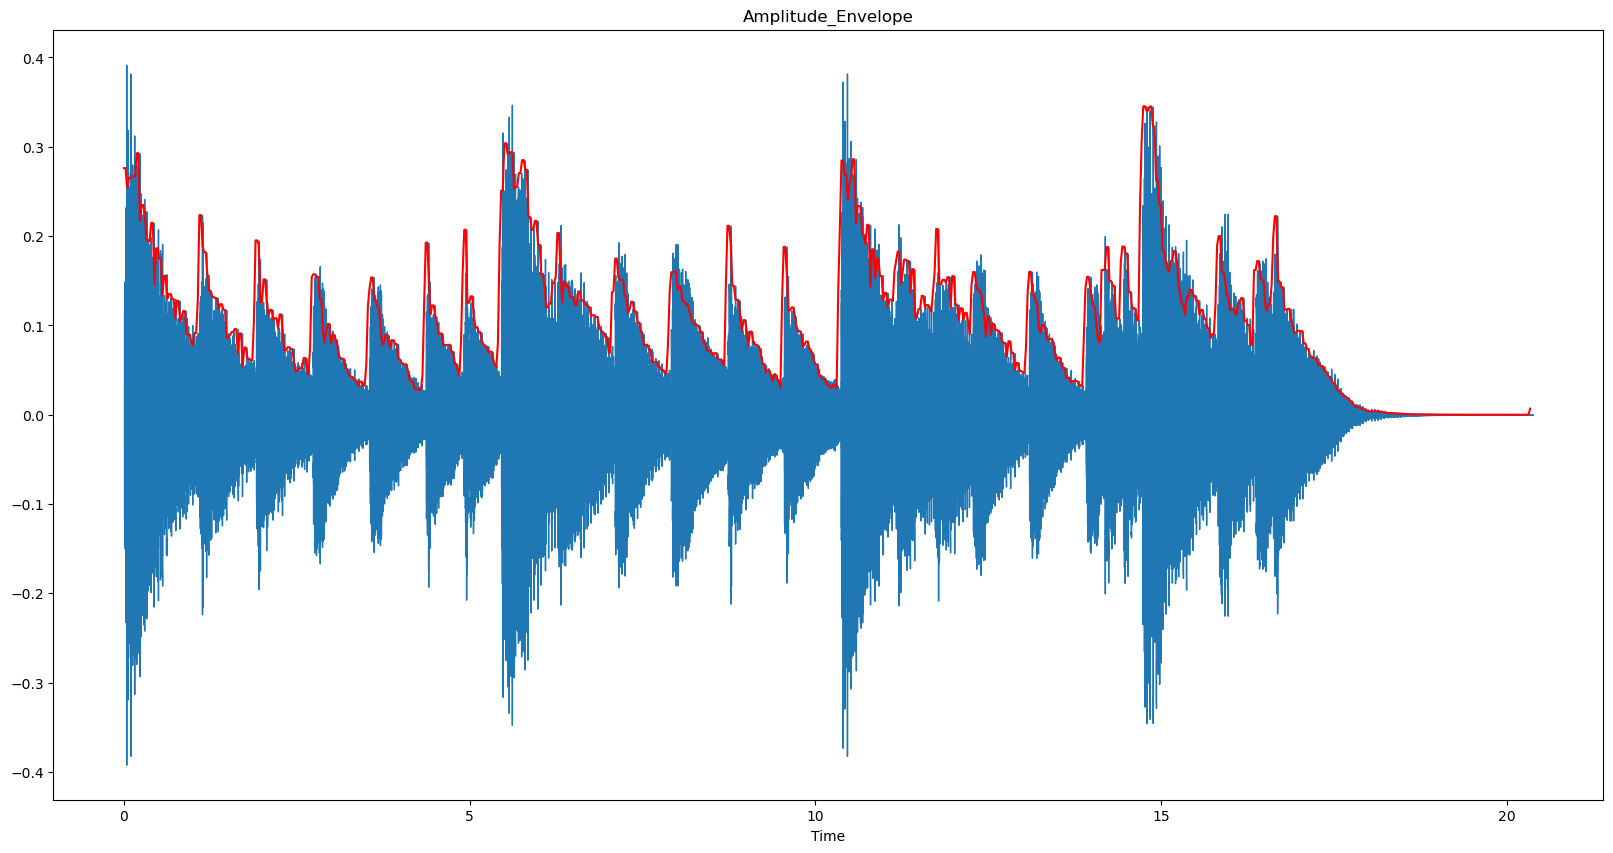

In [12]:
""" 提取信号的幅值包络
# 0.预设环境 下载语音库librosa 数组处理库nunpy
# 1. 加载信号 librosa.load()
# 2. 定义一个AE的函数，功能为取信号每一帧中幅值最值为该帧的包络
# 最值的获取方式：max(waveform[t*(frame_size-hop_size):t*frame_size])
# 3. 设置参数：每一帧长1024，以50%的重叠率分帧，调用该函数
# 4. 绘制信号的幅值包络信息
"""

# 0.预设环境 下载语音库librosa 数组处理库nunpy
import librosa
from librosa import display
import numpy as np
from matplotlib import pyplot as plt
# 1. 加载信号 librosa.load()
wave_path = "/Users/baijingyuan/Desktop/audio_data/music_piano.wav"
waveform, simple_rate = librosa.load(wave_path, sr = None)

# 2. 定义一个AE的函数，功能为取信号每一帧中幅值最值为该帧的包络
def Calc_Amplitude_Envelope(waveform, frame_length, hop_length):
    if len(waveform) % hop_length != 0:
        frame_num = int((len(waveform) - frame_length) / hop_length) + 1
        pad_num = frame_num * hop_length + frame_length - len(waveform)
        waveform = np.pad(waveform, (0, pad_num), mode = "wrap")
    frame_num = int((len(waveform) - frame_length) / hop_length) + 1
    waveform_ae = []
    for t in range(frame_num):
        current_frame = waveform[t*(frame_length - hop_length) : t*(frame_length - hop_length) + frame_length]
        current_ae = max(current_frame)
        waveform_ae.append(current_ae)
    return np.array(waveform_ae)
    
# 3. 设置参数：每一帧长1024，以50%的重叠率分帧，调用该函数
frame_size = 1024
hop_size = int(1024 * 0.5)
waveform_AE = Calc_Amplitude_Envelope(waveform, frame_length = frame_size, hop_length = hop_size)

# 4. 绘制信号的幅值包络信息
frame_scale = np.arange(0, len(waveform_AE))
time_scale = librosa.frames_to_time(frame_scale, hop_length = hop_size)
plt.figure(figsize = (20, 10))
librosa.display.waveshow(waveform)
plt.plot(time_scale, waveform_AE, color = "r")
plt.title("Amplitude_Envelope")
plt.show()

# Ch1. 信号时域分析 2. 均方根能量
![RSM.png](pictures/RSM.png)

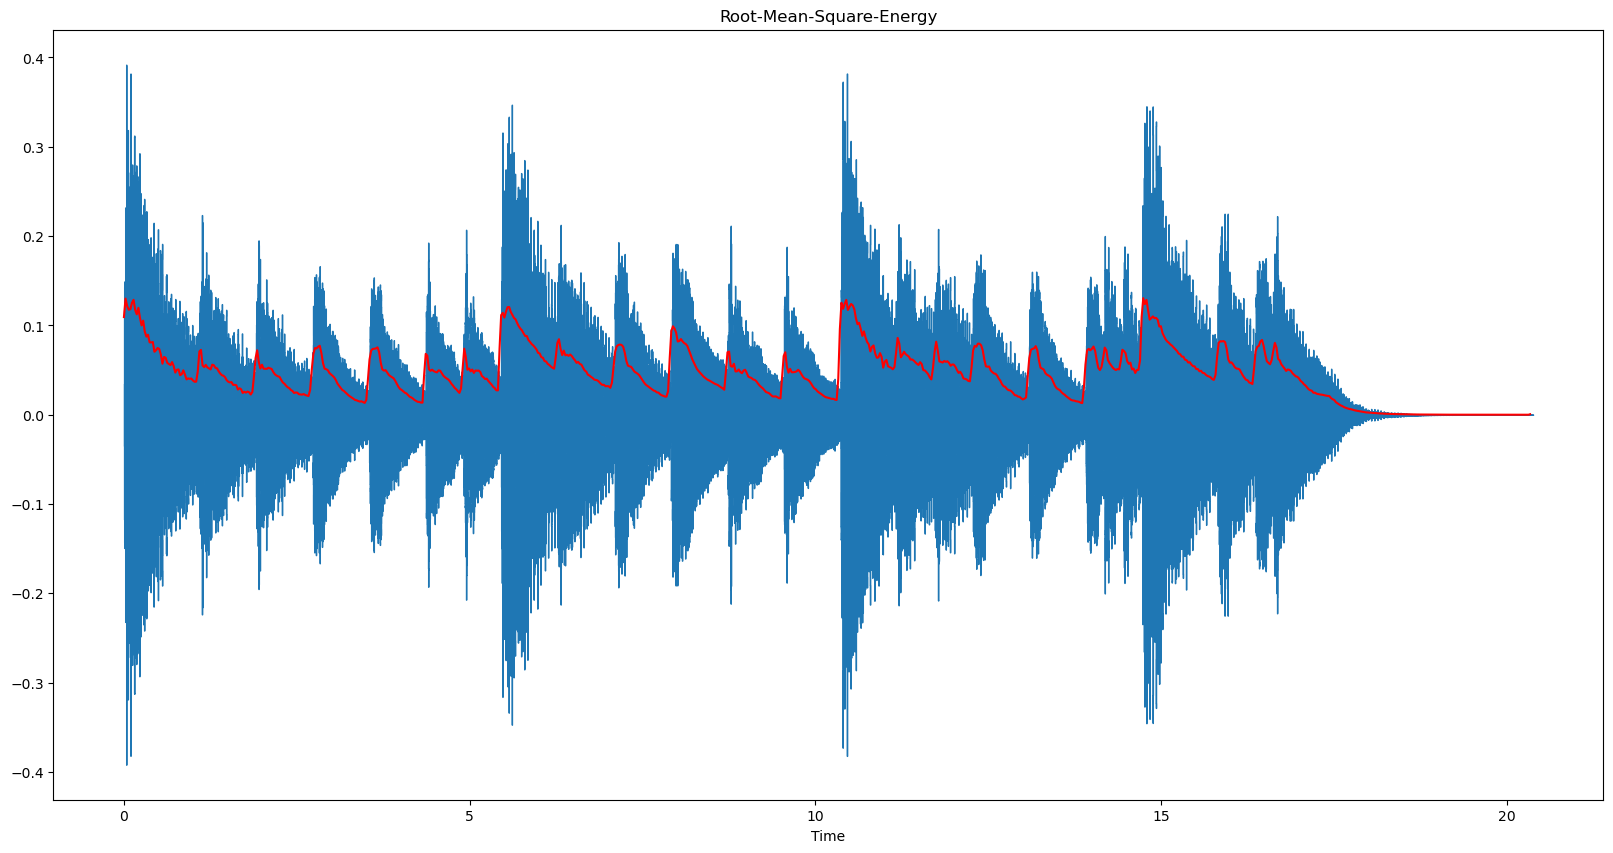

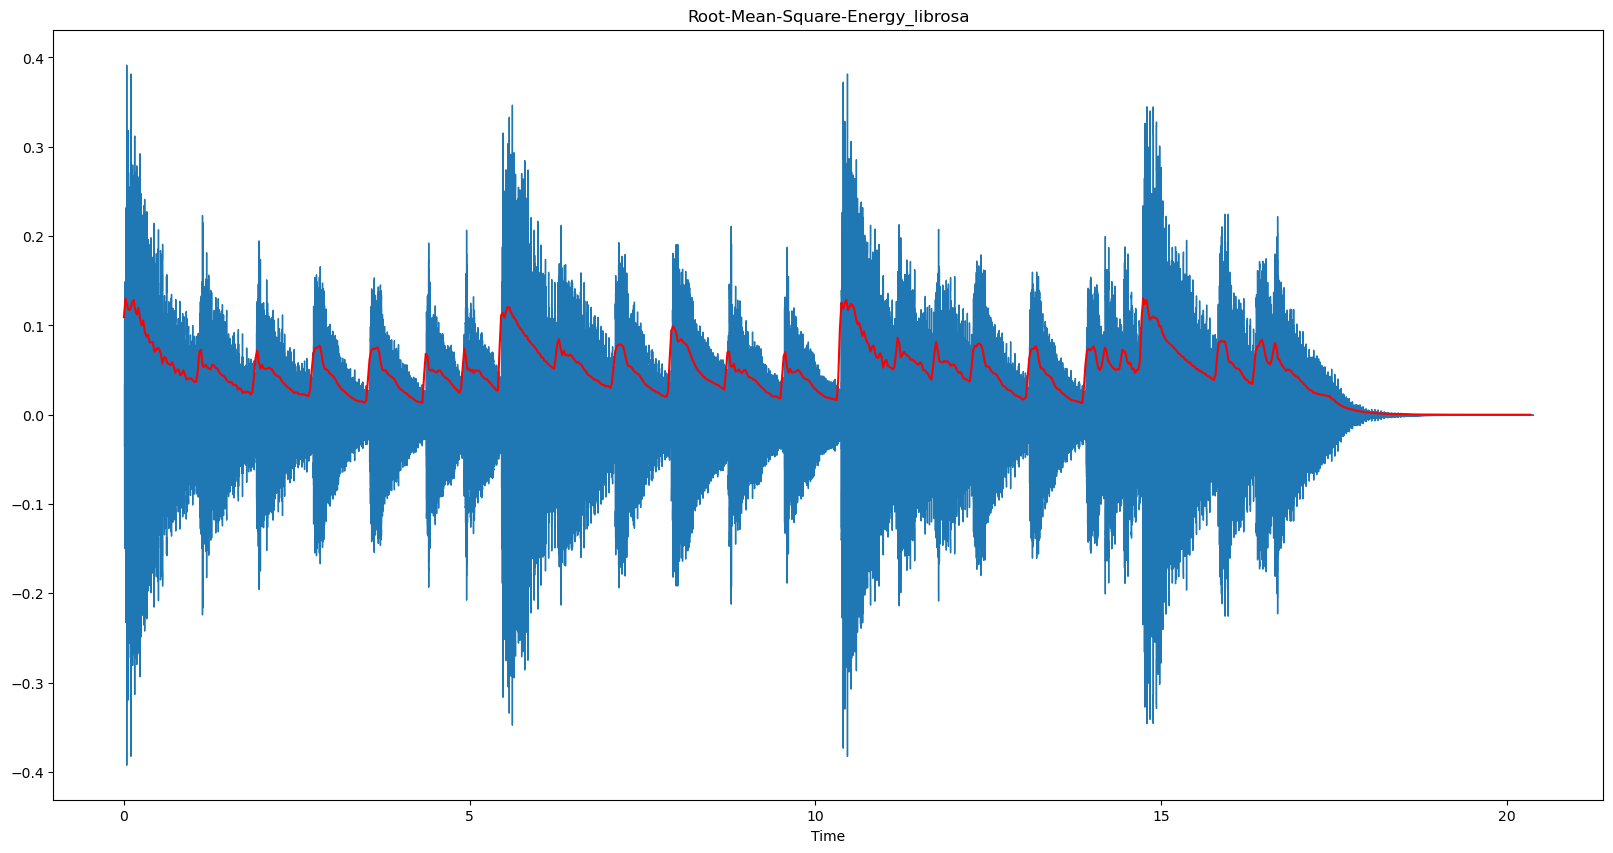

the bias is [ 5.49958491e-09 -9.98600591e-10 -1.15112625e-09  3.74437426e-11
 -1.83825655e-09  1.25656593e-09  1.50920765e-09  2.36412633e-09
 -4.95842284e-10  2.45860998e-10  3.78158727e-10 -2.36693680e-09
 -1.30469274e-10 -5.16977364e-10  1.26501745e-09  1.42848526e-09
 -2.61452429e-09  4.35570843e-09 -2.70021791e-09 -7.36073272e-10
 -4.43257653e-11  3.73385398e-09  2.29435262e-09 -3.57636470e-09
  1.60134422e-09  6.63819152e-10  1.66651069e-09 -8.82784505e-10
 -1.73561635e-09  4.16744514e-10  8.77076640e-10 -1.83669487e-09
  4.13679378e-09 -1.35121232e-09 -1.65632098e-09  1.44693757e-09
 -2.54201965e-10 -1.84939748e-09  2.68625427e-10 -3.50392548e-10
  4.97120838e-10  3.98916518e-10  7.12206398e-10  3.76296959e-10
  5.03132799e-10  5.43030135e-11  3.28827861e-10  3.17282572e-09
  5.90113416e-10 -1.31590762e-09  4.33509492e-10 -1.05342171e-09
  5.94575195e-10  1.31259017e-09  2.83454850e-10  1.81463907e-09
 -2.60755993e-10  1.51148082e-09  2.16048435e-09  1.31840198e-09
 -1.56355187e

In [30]:
"""信号的均方根值RootMeanSquareEnergy
# 0.预设环境
# 1.加载信号
# 2.定义函数RMS，功能：计算每一帧的均方根能量，
公式=该帧信号的平方和，取帧长的平均值后,开根号后
# 3.设置参数：每一帧长1024，以50%的重叠率分帧，调用该函数
# 4.绘制图像
# 5.利用librosa.feature.rms绘制信号的RMS
# 6.比较两者差异
"""

# 0.预设环境
import librosa
from librosa import display
from matplotlib import pyplot as plt
import numpy as np

# 1.加载信号
wave_path = "/Users/baijingyuan/Desktop/audio_data/music_piano.wav"
waveform, sr= librosa.load(wave_path, sr = None)

# 2.定义函数RMS，功能：计算每一帧的均方根能量，
def Calc_RMS(waveform, frame_length, hop_length):
    if len(waveform) % hop_length != 0:
        frame_num = int((len(waveform) - frame_length) / hop_length) + 1
        pad_num = frame_num * hop_length + frame_length - len(waveform)
        waveform = np.pad(waveform, pad_width = (0, pad_num), mode = "wrap")
    frame_num = int((len(waveform) - frame_length) / hop_length) + 1

    waveform_RMS = []
    for t in range(frame_num):
        current_frame = waveform[t * (frame_length - hop_length) : t * (frame_length - hop_length) + frame_length]
        current_RMS = np.sqrt(np.sum(current_frame ** 2) / frame_length)
        waveform_RMS.append(current_RMS)
    return np.array(waveform_RMS)

# 3.设置参数：每一帧长1024，以50%的重叠率分帧，调用该函数
frame_size = 1024
hop_size = int(1024 * 0.5)
waveform_RMS = Calc_RMS(waveform, frame_length = frame_size, hop_length = hop_size)

# 4.绘制图像
frame_scale = np.arange(0, len(waveform_RMS), step = 1)
time_scale = librosa.frames_to_time(frame_scale)
plt.figure(figsize = (20,10))
librosa.display.waveshow(waveform)
plt.plot(time_scale, waveform_RMS, color="r")
plt.title("Root-Mean-Square-Energy")
plt.show()

# 5.利用librosa.feature.rms绘制信号的RMS
waveform_RMS_librosa = librosa.feature.rms(y = waveform, frame_length = frame_size, hop_length = hop_size).T[1:,0]
plt.figure(figsize = (20,10))
librosa.display.waveshow(waveform)
plt.plot(time_scale, waveform_RMS_librosa, color = "r")
plt.title("Root-Mean-Square-Energy_librosa")
plt.show()

# 6.比较两者差异
bias = waveform_RMS_librosa - waveform_RMS
print(f"the bias is {bias}\n Congratulation!")

# Ch1 .信号时域分析 3. 过零率分析
![ZCR.png](pictures/ZCR.png)

bias =  [ 0.00097656  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.00097656
  0.00097656  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.01074219 -0.01904297 -0.00097656
  0.00341797 -0.00097656  0.00292969  0.          0.          0.
  0.          0.         -0.00195312 -0.00097656  0.00097656  0.
  0.00097656  0.00097656  0.          0.          0.          0.00097656
  0.00097656  0.          0.          0.          0.          0.
  0.00097656  0.00292969 -0.00292969 -0.00488281  0.00097656  0.00097656
  0.          0.          0.          0.          0.          0.
  0.         -0.00585938]


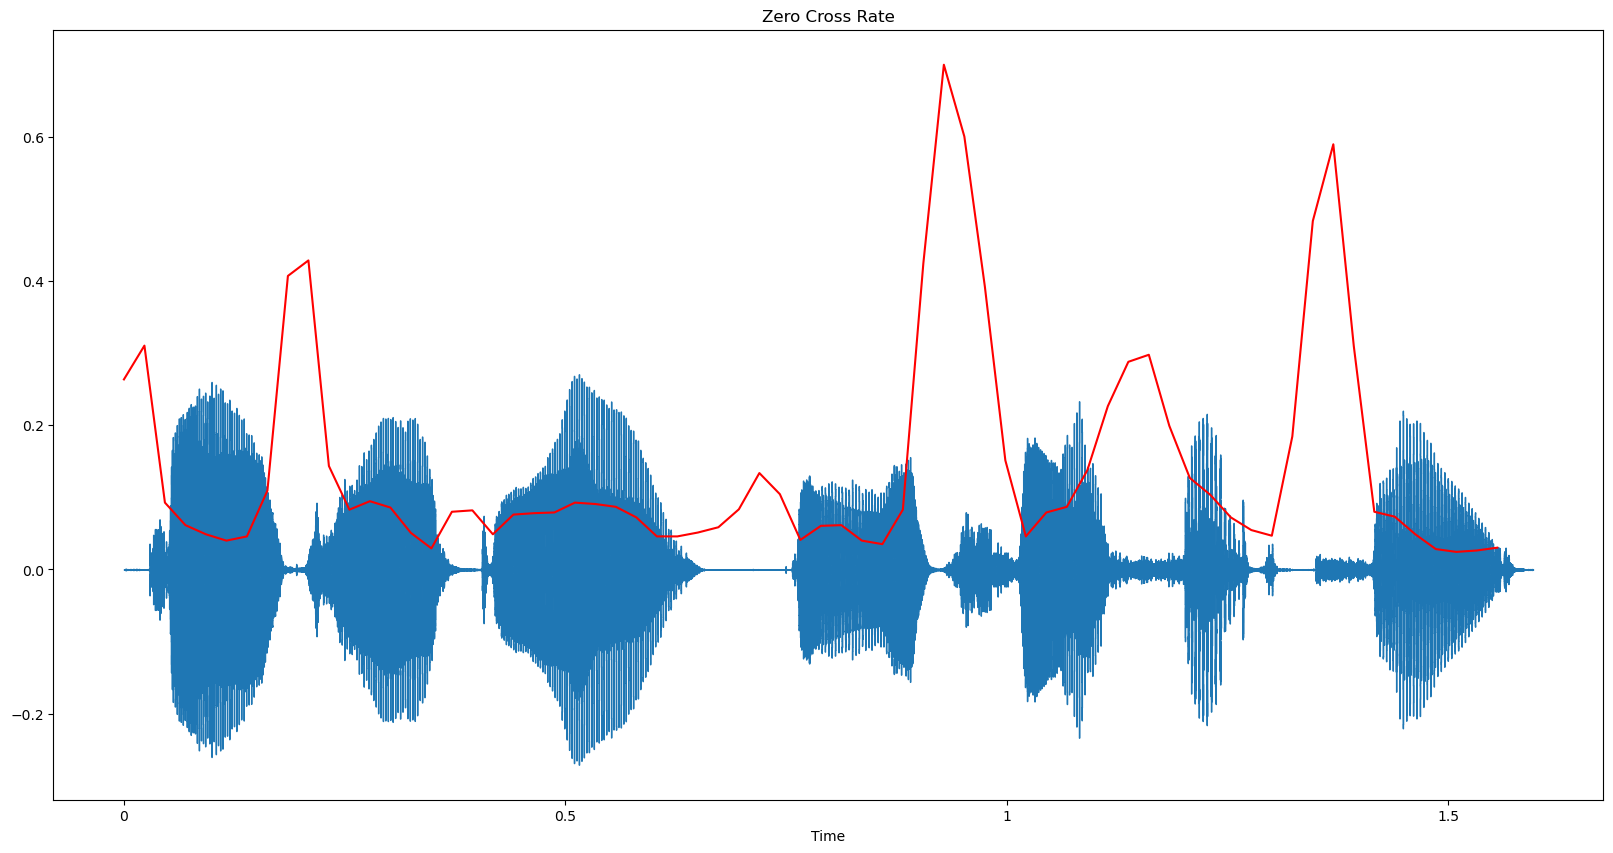

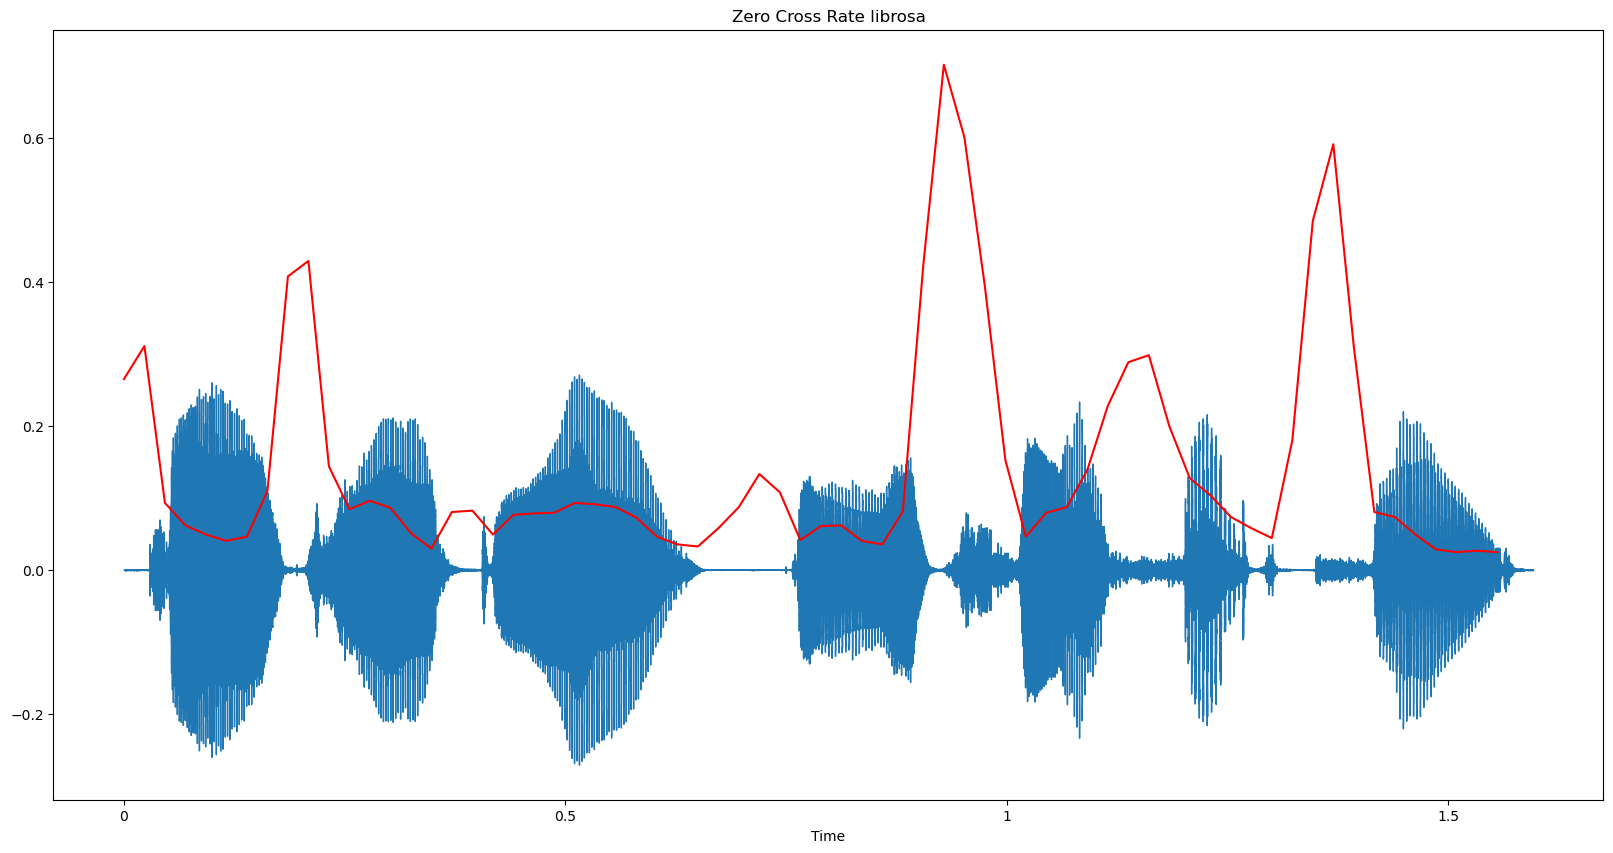

In [33]:
"""信号的过零率ZCR
# 0.预设环境
# 1.加载信号
# 2.定义函数，功能：计算每一帧的过零率，
公式=该帧信号的平方和，开根号后，取帧长的平均值
np.sum(np.abs(np.sign(a)-np.sign(b)))/2/frame_length
# 3.设置参数：每一帧长1024，以50%的重叠率分帧，调用该函数
# 4.绘制图像
# 5.利用librosa.feature.
# 6.比较两者差异
"""

# 0.预设环境
import numpy as np
import librosa
import librosa.display
from matplotlib import pyplot as plt

# 1.加载信号
wave_path = "/Users/baijingyuan/Desktop/audio_data/speech_this_song.wav"
waveform, sr = librosa.load(wave_path, sr = None)

# 2.定义函数，功能：计算每一帧的过零率，
def Calc_ZCR(waveform, frame_length, hop_length):
    if len(waveform) % hop_length != 0:
        frame_num = int((len(waveform) - frame_length) / hop_length) + 1
        pad_num = frame_num * hop_length + frame_length - len(waveform)
        waveform = np.pad(waveform, (0, pad_num), 'wrap')
    frame_num = int((len(waveform) - frame_length) / hop_length) + 1
    waveform_ZCR = []
    for t in range(frame_num):
        current_frame = waveform[(frame_length - hop_length) * t : (frame_length - hop_length) * t + frame_length]
        a = np.sign(current_frame[0 : frame_length - 1], )
        b = np.sign(current_frame[1 : frame_length], )
        current_ZCR = np.sum(np.abs(a - b)) / frame_length / 2
        waveform_ZCR.append(current_ZCR)
    return np.array(waveform_ZCR)
    
# 3.设置参数：每一帧长1024，以50%的重叠率分帧，调用该函数
frame_size = 1024
hop_size = int(1024 * 0.5)
waveform_ZCR = Calc_ZCR(waveform, frame_size, hop_size)

# 4.绘制图像
frame_scale = np.arange(0, len(waveform_ZCR), step = 1)
time_scale = librosa.frames_to_time(frame_scale)
plt.figure(figsize = (20, 10))
librosa.display.waveshow(waveform)
plt.plot(time_scale, waveform_ZCR, color = 'r')
plt.title("Zero Cross Rate")

# 5.利用librosa.feature.
waveform_ZCR_librosa = librosa.feature.zero_crossing_rate(waveform, frame_length = frame_size, hop_length = hop_size).T[1:, 0]
plt.figure(figsize = (20, 10))
librosa.display.waveshow(waveform)
plt.plot(time_scale, waveform_ZCR_librosa, color = 'r')
plt.title("Zero Cross Rate librosa")

# 6.比较两者差异
bias = waveform_ZCR_librosa - waveform_ZCR
print("bias = ", bias)

# Ch1 .信号频域分析 4. 谱质心与子带带宽分析
![SC_SB.png](pictures/SC_SB.png)

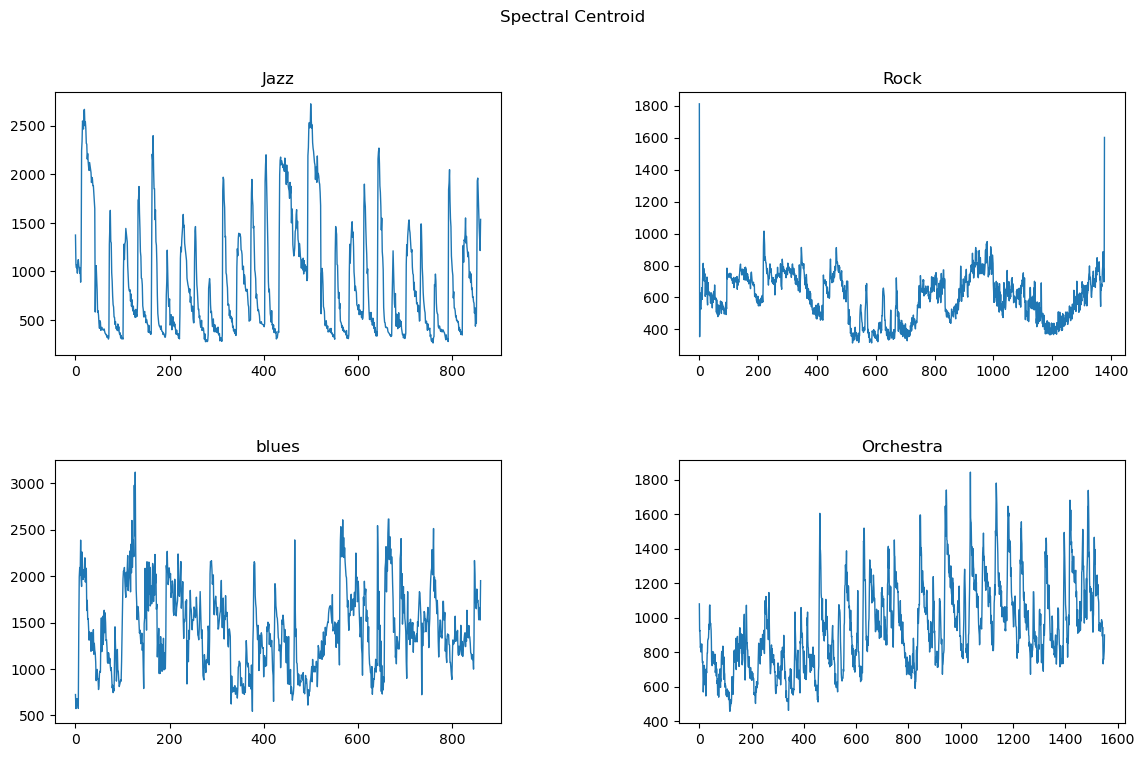

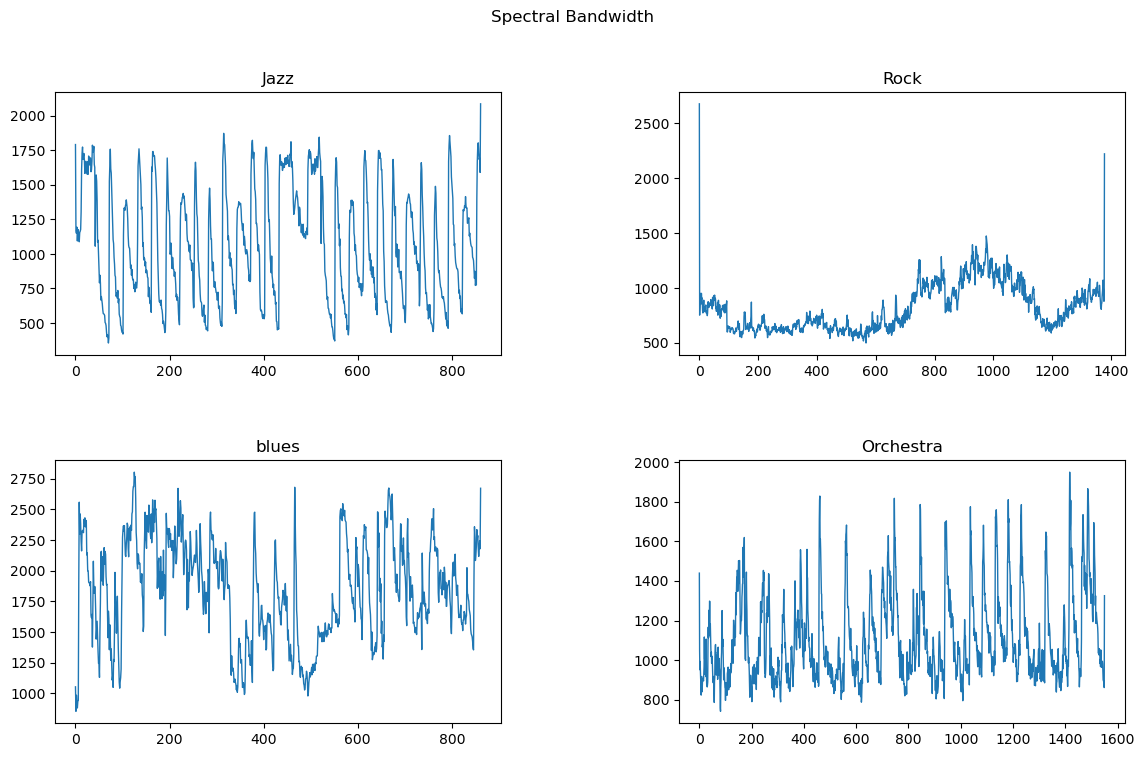

In [6]:
"""信号的频域特征
# 1. 加载信号
# 2. 获得信号的Spectral centroid和bandwidth
librosa.feature.spectral_centroid(y=waveform)
# 3. 获得信号的Spectral bandwidth
librosa.feature.spectral_bandwidth(y=waveform)
"""

# 1. 加载信号
import numpy as np
import librosa
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (13.8, 8.2)

jazz_path = "/Users/baijingyuan/Desktop/audio_data/jazz.wav"
jazz, sr = librosa.load(jazz_path, sr = None)

rock_path = "/Users/baijingyuan/Desktop/audio_data/rock.wav"
rock, sr = librosa.load(rock_path, sr = None)

blues_path = "/Users/baijingyuan/Desktop/audio_data/blues.wav"
blues, sr = librosa.load(blues_path, sr = None)

orchestra_path = "/Users/baijingyuan/Desktop/audio_data/orchestra.wav"
orchestra, sr = librosa.load(orchestra_path, sr = None)

# 2. 获得信号的Spectral centroid和bandwidth
sc_jazz = librosa.feature.spectral_centroid(y = jazz, n_fft = 1024).T[:, 0]

sc_rock = librosa.feature.spectral_centroid(y = rock, n_fft = 1024).T[:, 0]

sc_blues = librosa.feature.spectral_centroid(y = blues, n_fft = 1024).T[:, 0]

sc_orchestra = librosa.feature.spectral_centroid(y = orchestra, n_fft = 1024).T[:, 0]

fig, aix = plt.subplots(2, 2)
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
aix[0, 0].plot(np.arange(len(sc_jazz)), sc_jazz, linewidth = 1)
aix[0, 0].set_title("Jazz")

aix[0, 1].plot(np.arange(len(sc_rock)), sc_rock, linewidth = 1)
aix[0, 1].set_title("Rock")

aix[1, 0].plot(np.arange(len(sc_blues)), sc_blues, linewidth = 1)
aix[1, 0].set_title("blues")

aix[1, 1].plot(np.arange(len(sc_orchestra)), sc_orchestra, linewidth = 1)
aix[1, 1].set_title("Orchestra")

fig.suptitle("Spectral Centroid")
plt.show()

# 3. 获得信号的Spectral bandwidth
sb_jazz = librosa.feature.spectral_bandwidth(y = jazz, n_fft = 1024).T[ :, 0]

sb_rock = librosa.feature.spectral_bandwidth(y = rock, n_fft = 1024).T[ :, 0]

sb_blues = librosa.feature.spectral_bandwidth(y = blues, n_fft = 1024).T[ :, 0]

sb_orchestra = librosa.feature.spectral_bandwidth(y = orchestra, n_fft = 1024).T[ :, 0]

fig, aix = plt.subplots(2, 2)
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)
aix[0, 0].plot(np.arange(len(sb_jazz)), sb_jazz, linewidth = 1)
aix[0, 0].set_title("Jazz")

aix[0, 1].plot(np.arange(len(sb_rock)), sb_rock, linewidth = 1)
aix[0, 1].set_title("Rock")

aix[1, 0].plot(np.arange(len(sb_blues)), sb_blues, linewidth = 1)
aix[1, 0].set_title("blues")

aix[1, 1].plot(np.arange(len(sb_orchestra)), sb_orchestra, linewidth = 1)
aix[1, 1].set_title("Orchestra")

fig.suptitle("Spectral Bandwidth")
plt.show()


# Ch1 .信号时频域分析 5. 短时傅里叶分析法STFT
![STFT1.png](pictures/STFT1.png)
![STFT2.png](pictures/STFT2.png)

/var/folders/qm/hz9vhdr52jv9j1wdl6yd11d40000gn/T/ipykernel_69956/3085726013.py:43: RuntimeWarning: divide by zero encountered in log10
  waveform_db = 20 * np.log10(waveform_pow)


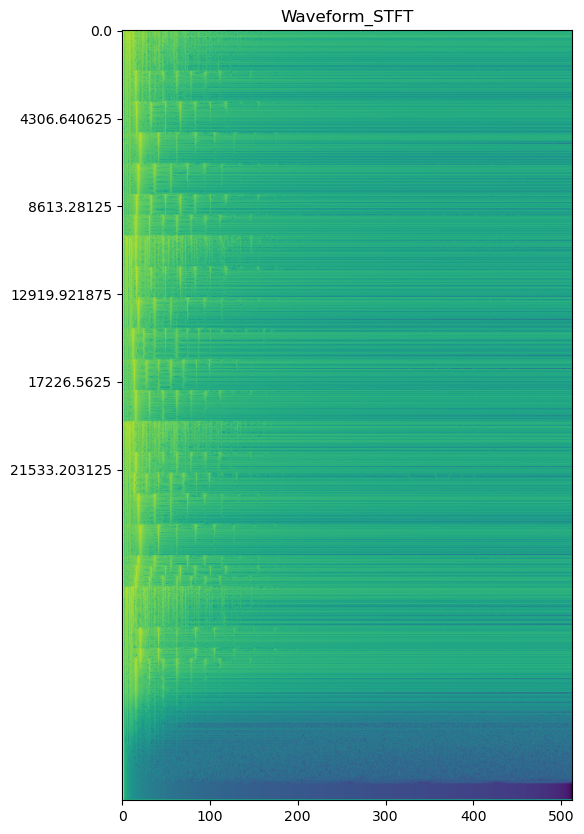

In [35]:
"""信号的STFT
# 1.加载信号
# 2.信号分帧：补零->分帧->加窗
# 3.信号做傅里叶变换np.fft.rfft(waveform_frame,n_fft)
# waveform_fft = np.fft.rfft(waveform_win,n_fft)
# 4.功率谱函数waveform_pow = np.abs(waveform_fft)**2/n_fft
# waveform_db = 20* np.log10(waveform_pow)
# 4.绘制波形
"""

import librosa
import numpy as np
from matplotlib import pyplot as plt

# 1.加载信号
wave_path = "/Users/baijingyuan/Desktop/audio_data/music_piano.wav"
waveform, sr = librosa.load(wave_path, sr = None)

# 2.信号分帧：补零->分帧->加窗

    # 补零
frame_size, hop_size = 1024, int(1024 * 0.5)
if len(waveform) % hop_size != 0:
    frame_num = int((len(waveform) - frame_size) / hop_size) + 1
    pad_num = frame_num * hop_size +frame_size - len(waveform)
    waveform = np.pad(waveform, (0, pad_num), 'wrap')
frame_num = int((len(waveform) - frame_size) / hop_size) + 1 

    # 分帧
row = np.tile(np.arange(0, frame_size, step = 1), (frame_num, 1))
column = np.tile(np.arange(0, frame_num * (frame_size - hop_size), step = frame_size - hop_size), (frame_size, 1)).T
index = row + column
waveform_frame = waveform[index]

    # 加窗
waveform_frame = waveform_frame + np.hanning(frame_size)

# 3.信号做傅里叶变换np.fft.rfft(waveform_frame,n_fft)
waveform_stft = np.fft.rfft(waveform_frame, 1024)

# 4.功率谱函数waveform_pow = np.abs(waveform_stft)**2/n_fft
waveform_pow = np.abs(waveform_stft)**2/1024
waveform_db = 20 * np.log10(waveform_pow)

# 5.绘制波形
plt.figure(figsize = (10, 10))
plt.imshow(waveform_db)
y_ticks = np.arange(0, int(1024/2), 100)
plt.yticks(ticks = y_ticks, labels = y_ticks * sr / 1024)
plt.title("Waveform_STFT")
plt.show()


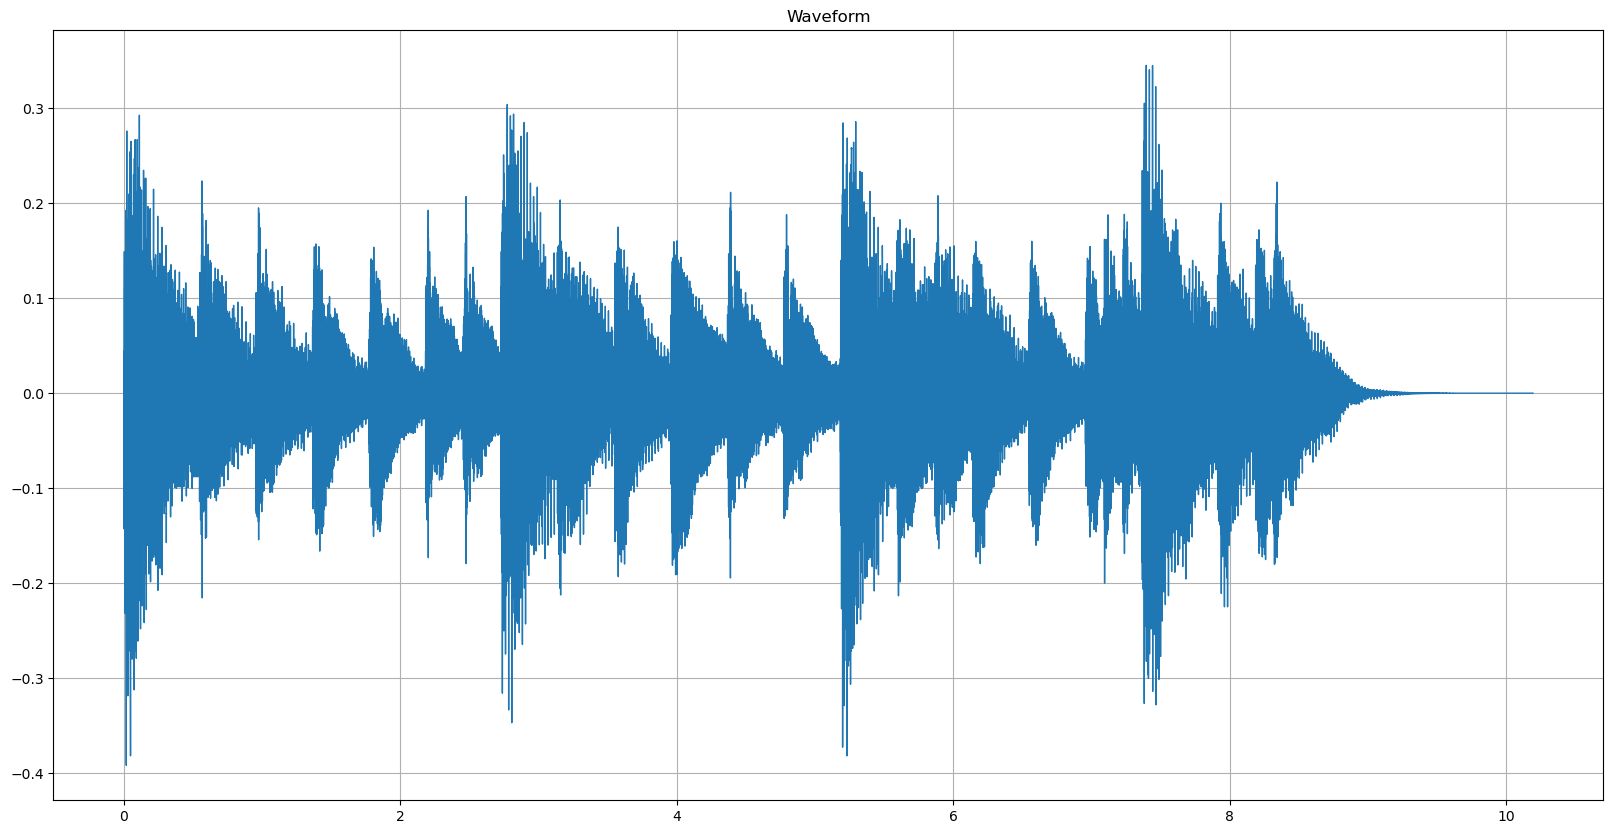

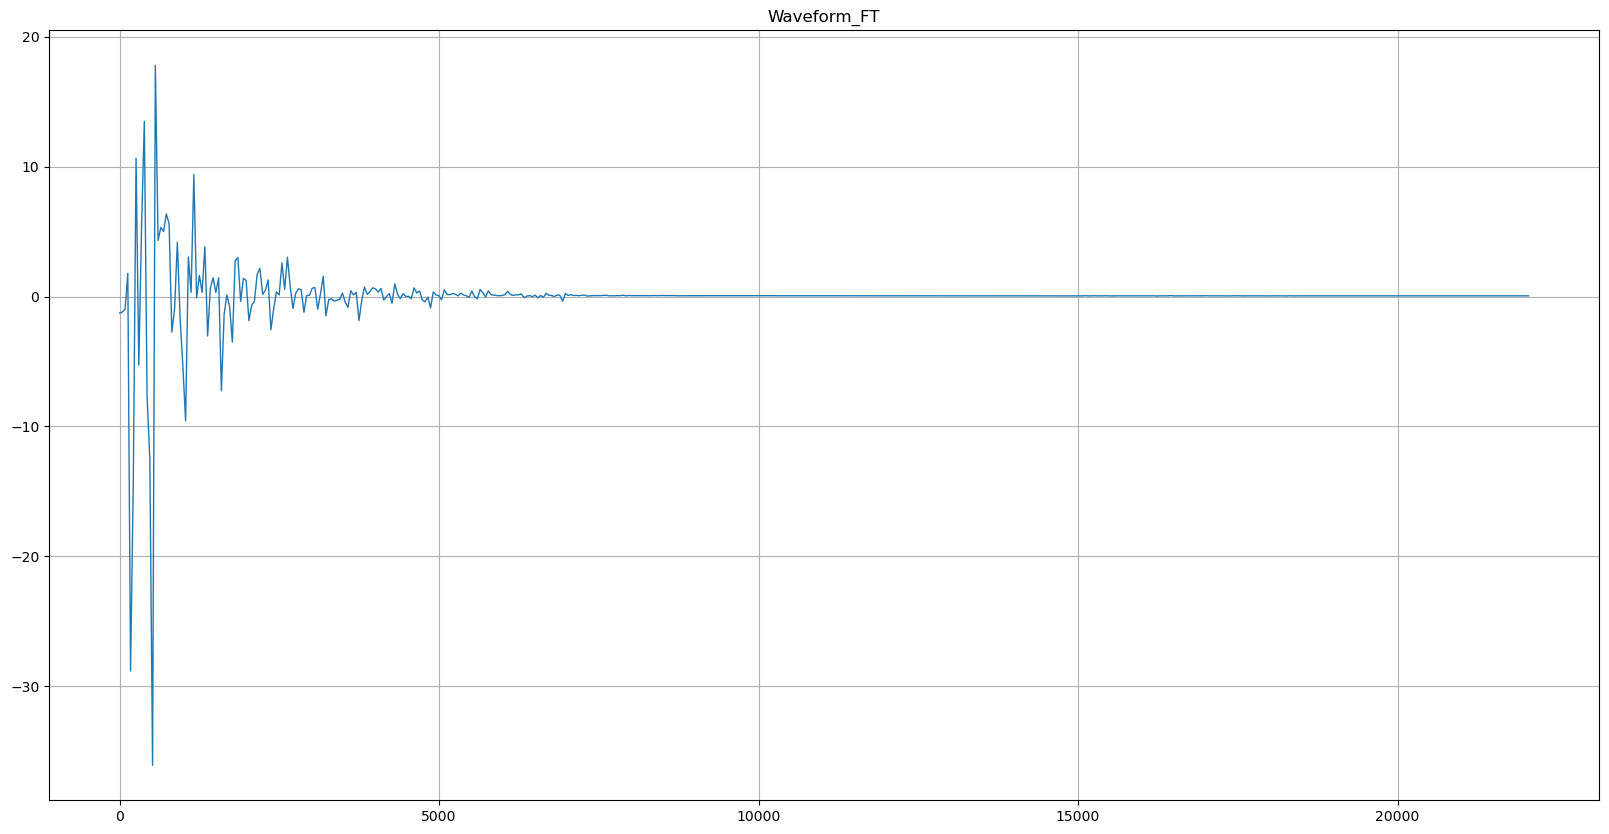

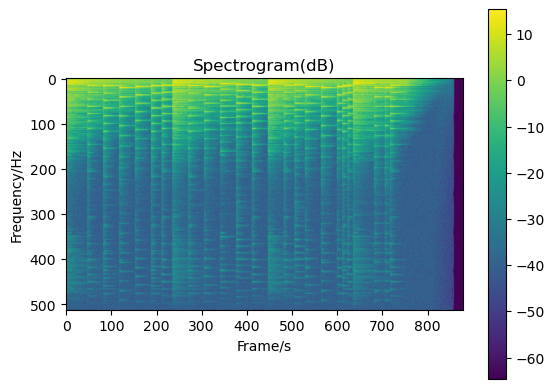

In [4]:
""" 绘制信号的STFT-librosa
# 1.加载信号
# 2.设置参数，调用librosa.stft函数
# 3.创建一个独立的画图文件，方便调用
# 4.绘制STFT
"""

import librosa
import numpy as np
from matplotlib import pyplot as plt
from plotf import plot_waveform, plot_waveform_fft, plot_spectrogram
# 1.加载信号
wave_path = "/Users/baijingyuan/Desktop/audio_data/music_piano.wav"
waveform, sr = librosa.load(wave_path, sr = None)

plot_waveform(waveform, sr)
plot_waveform_fft(waveform, sr, n_fft = 1024)

# 2.设置参数，调用librosa.stft函数
n_fft = 1024
hop_size = 512
waveform_stft_librosa = librosa.stft(waveform, n_fft = n_fft, hop_length=hop_size)

plot_spectrogram(np.abs(waveform_stft_librosa))
